In [1]:
import pandas as pd
import numpy as np
from sklearn import *

from sklearn.metrics import accuracy_score
import warnings 
warnings.simplefilter('ignore')

In [2]:
malware_dataset = pd.read_csv('datasets/MalwareArtifacts.csv', delimiter=',')
# Extracting artifacts samples fields "AddressOfEntryPoint" and "DllCharacteristics"
samples = malware_dataset.iloc[:, [0, 4]].values
targets = malware_dataset.iloc[:, 8].values

In [3]:
from sklearn.model_selection import train_test_split

training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.2, random_state=0)

In [22]:
print(training_samples.shape,testing_samples.shape, training_targets.shape, testing_targets.shape )

(109955, 2) (27489, 2) (109955,) (27489,)


In [40]:
# Decision Tree Classifier

tree_classifier = tree.DecisionTreeClassifier(max_depth=3)

In [41]:
tree_classifier.fit(training_samples, training_targets)

DecisionTreeClassifier(max_depth=3)

In [42]:
tree_predictions = tree_classifier.predict(testing_samples)

In [43]:
tree_accuracy = 100.0 * accuracy_score(testing_targets, tree_predictions)
print ("Decision Tree accuracy: " + str(tree_accuracy))

Decision Tree accuracy: 91.10917094110371


In [44]:
# Random Forest Classifier

rfc =  ensemble.RandomForestClassifier(n_estimators=50) 

In [45]:
rfc.fit(training_samples, training_targets)

RandomForestClassifier(n_estimators=50)

In [46]:
rfc_accuracy = rfc.score(testing_samples, testing_targets)
print("Random Forest Classifier accuracy: " + str(rfc_accuracy*100) )

Random Forest Classifier accuracy: 96.34762996107534


==========  EXPERIMENTS FOR HOMEWORK 2 ================

Loading out dataset generated from 10 exe files (2 of them are malware)

In [47]:
my_dataset = pd.read_csv('soft_artifacts.csv', delimiter=',')
my_samples = my_dataset.iloc[:, [1, 5]].values
my_targets = my_dataset.iloc[:, 9].values

In [48]:
# Predict using Decision Tree Classifier
my_tree_predictions = tree_classifier.predict(my_samples)

In [49]:
# Evaluate prediction results
my_tree_accuracy = 100.0 * accuracy_score(my_targets, my_tree_predictions)
print ("Decision Tree accuracy: " + str(my_tree_accuracy))

Decision Tree accuracy: 20.0


In [50]:
sample_id = 0
sample = my_samples[sample_id].reshape(1, -1)
node_indicator = tree_classifier.decision_path(sample)
leaf_id = tree_classifier.apply(sample)

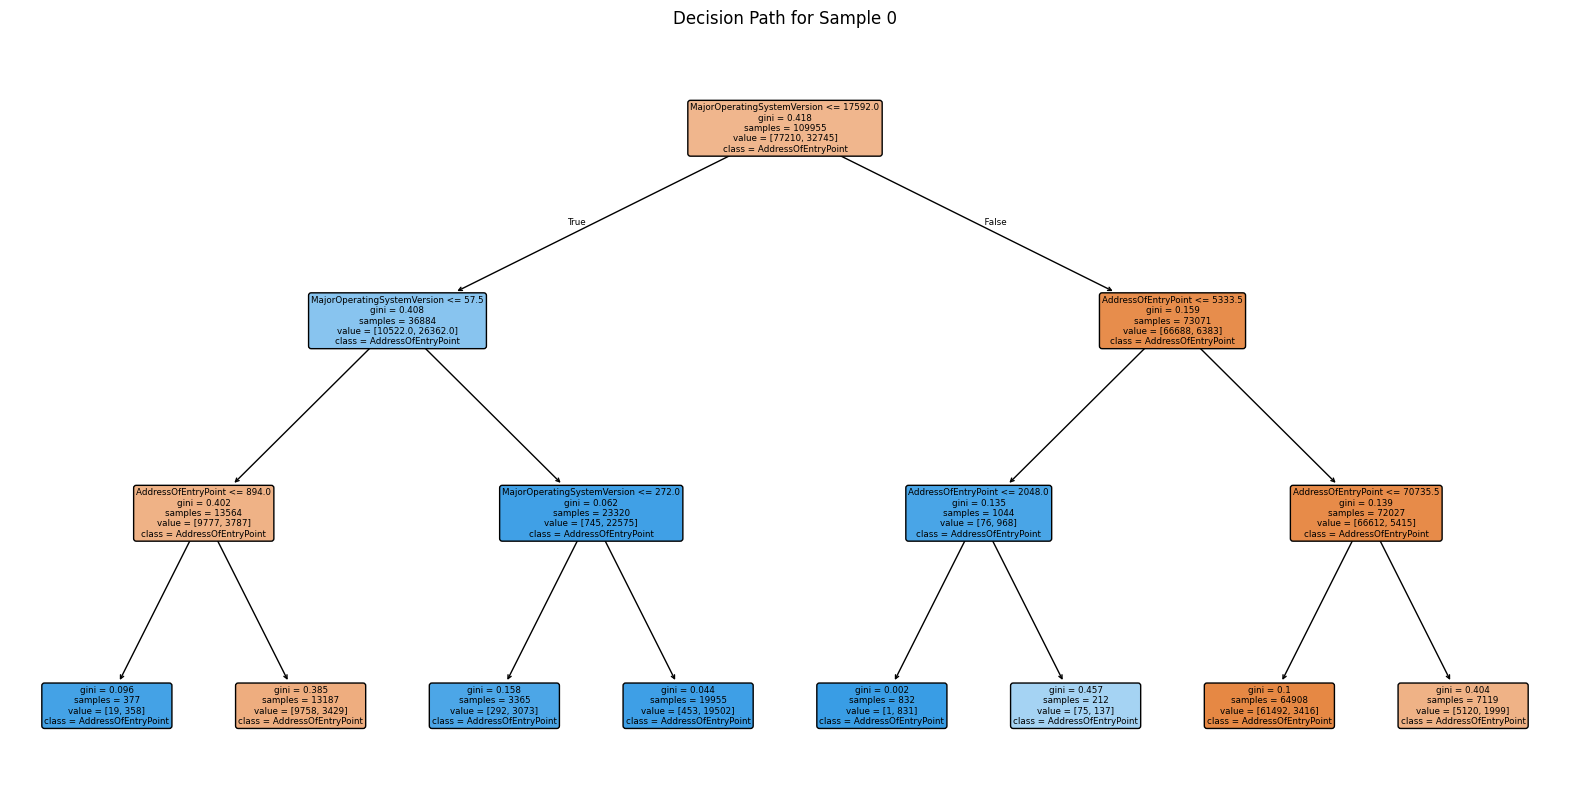

In [51]:
# Visualize the tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    tree_classifier,
    filled=True,               # color the nodes by class
    rounded=True,              # rounded corners
    feature_names=["AddressOfEntryPoint", "MajorOperatingSystemVersion"],  # Replace with your actual feature names
    class_names=["AddressOfEntryPoint", "AddressOfEntryPoint"]          # Replace with your actual class names
)
# Highlight path
# We’ll circle the nodes in the path using matplotlib
ax = plt.gca()

# Get the list of all nodes in the path
nodes_in_path = node_indicator.indices

# Annotate nodes with a red circle
for node_id in nodes_in_path:
    # Get the position of the node in the tree plot
    # NOTE: This is a hack; there's no official API to get node positions.
    # So we use a trick: re-plot and get the text elements.
    for text in ax.texts:
        if text.get_text().startswith(f'node {node_id}'):
            bbox = text.get_window_extent(renderer=plt.gcf().canvas.get_renderer())
            # Draw a red circle around it (approximate location)
            circ = plt.Circle((bbox.x0 + bbox.width/2, bbox.y0 + bbox.height/2), 
                              radius=20, color='red', fill=False, linewidth=2, transform=None)
            ax.add_patch(circ)

plt.title(f"Decision Path for Sample {sample_id}")
plt.show()

In [44]:
# Use Random forest clssifier and evaluate the results
my_rfc_accuracy = rfc.score(my_samples, my_targets)
print("Random Forest Classifier accuracy: " + str(my_rfc_accuracy*100) )

Random Forest Classifier accuracy: 50.0


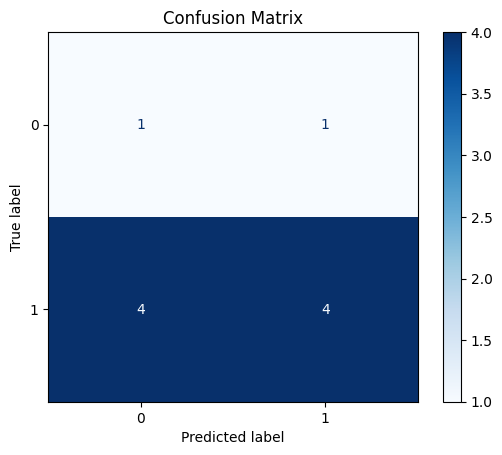

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

my_rfc_predictions = rfc.predict(my_samples)
cm = confusion_matrix(my_targets, my_rfc_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

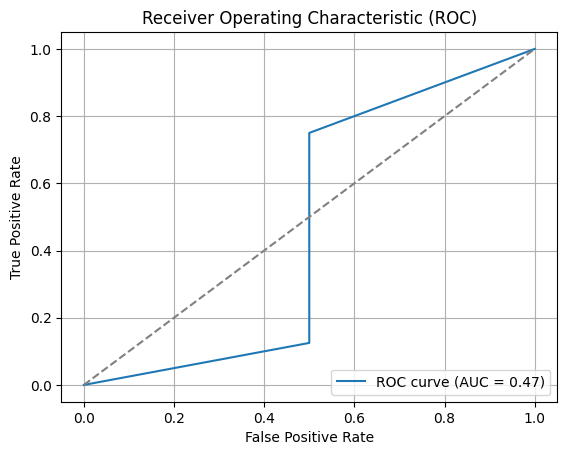

In [18]:
# ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
probs = rfc.predict_proba(my_samples)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(my_targets, probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

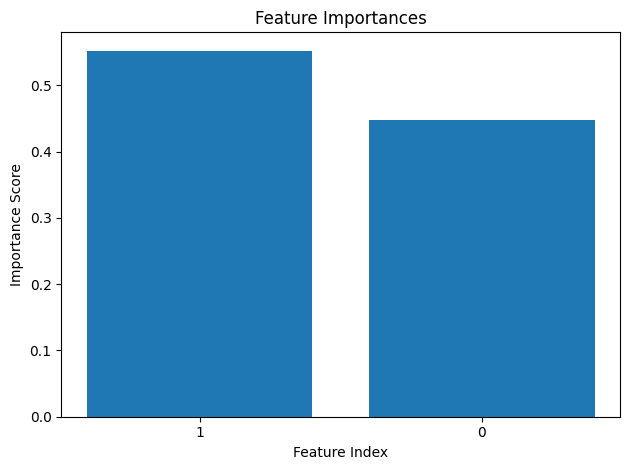

In [19]:
#  Feature Importance Plot
import numpy as np

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()